In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
try:
    df = pd.read_csv('weatherAUS.csv', encoding='ISO-8859-1')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'weatherAUS.csv' not found. Please ensure the file is in the correct directory.")
    exit()


Dataset loaded successfully.


In [2]:
print(df.head)

<bound method NDFrame.head of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W  

In [3]:
# Display the last 5 rows of the DataFrame
print("\nLast 5 rows of the dataset:")
print(df.tail)


Last 5 rows of the dataset:
<bound method NDFrame.tail of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0

In [4]:
# Display a random sample of 5 rows
print("\nRandom 5 rows of the dataset:")
print(df.sample(5))


Random 5 rows of the dataset:
              Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
100397  2011-06-03  MountGambier     10.3     15.4       1.8          1.6   
40999   2013-03-31   Williamtown     15.4     26.5       3.6         15.6   
63331   2015-02-17          Sale     17.1     20.7       0.0          NaN   
69652   2015-06-16     Melbourne      NaN      NaN       NaN          1.0   
113284  2013-10-29   Witchcliffe     11.5     24.3       0.2          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
100397       4.1         WNW           48.0          W  ...        92.0   
40999        NaN         WNW           35.0        WNW  ...        78.0   
63331        NaN         SSE           26.0        ESE  ...        80.0   
69652        0.0           N           30.0          E  ...         NaN   
113284       NaN         SSE           44.0        ESE  ...        82.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am

In [5]:
# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am    

In [6]:
# Get the shape of the DataFrame (number of rows, number of columns)
print(f"\nShape of the DataFrame: {df.shape} (rows, columns)")


Shape of the DataFrame: (145460, 23) (rows, columns)


In [7]:
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [11]:
# Calculate the number of missing values for each column
missing_values = df.isnull().sum()
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
# Create a DataFrame to display missing values
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

# Filter to show only columns with missing values and sort them
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

print("\nMissing Values Analysis:")
print(missing_df)


Missing Values Analysis:
               Missing Count  Missing Percentage
Sunshine               69835           48.009762
Evaporation            62790           43.166506
Cloud3pm               59358           40.807095
Cloud9am               55888           38.421559
Pressure9am            15065           10.356799
Pressure3pm            15028           10.331363
WindDir9am             10566            7.263853
WindGustDir            10326            7.098859
WindGustSpeed          10263            7.055548
Humidity3pm             4507            3.098446
WindDir3pm              4228            2.906641
Temp3pm                 3609            2.481094
RainTomorrow            3267            2.245978
Rainfall                3261            2.241853
RainToday               3261            2.241853
WindSpeed3pm            3062            2.105046
Humidity9am             2654            1.824557
WindSpeed9am            1767            1.214767
Temp9am                 1767            1.2

C:\Users\f-moharami\AppData\Local\Temp\ipykernel_2804\783575730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_df.index, y=missing_df['Missing Percentage'], palette='viridis')


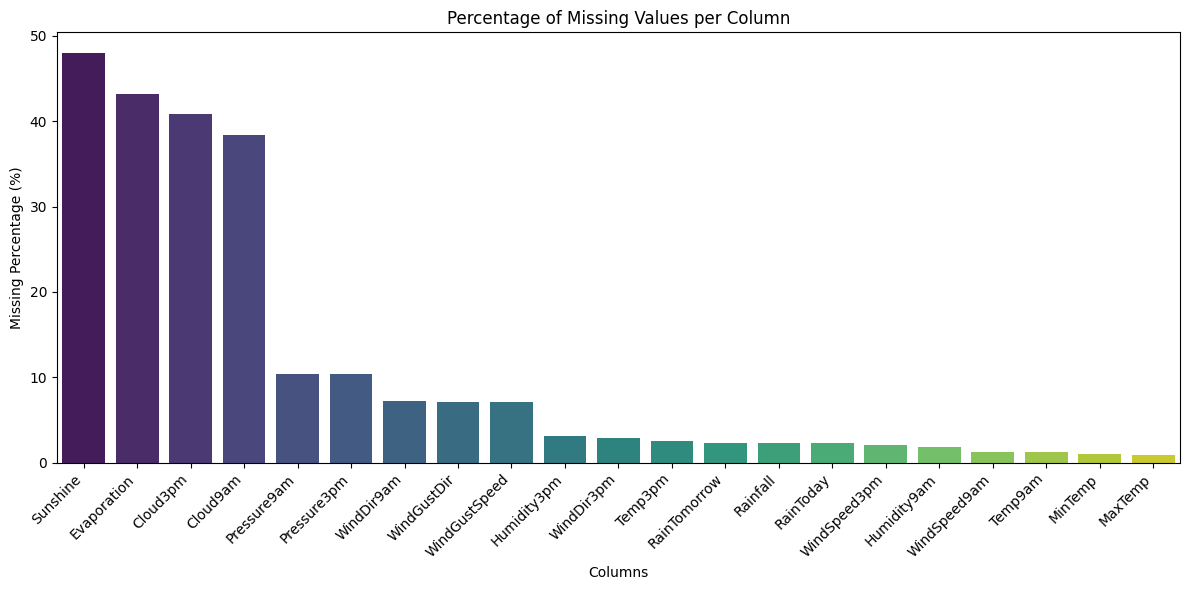

In [12]:

# Visualize missing values (optional, but good for juniors to learn)
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y=missing_df['Missing Percentage'], palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Missing Values per Column')
plt.ylabel('Missing Percentage (%)')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

In [13]:
# Display descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())


Descriptive Statistics for Numerical Columns:
             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   


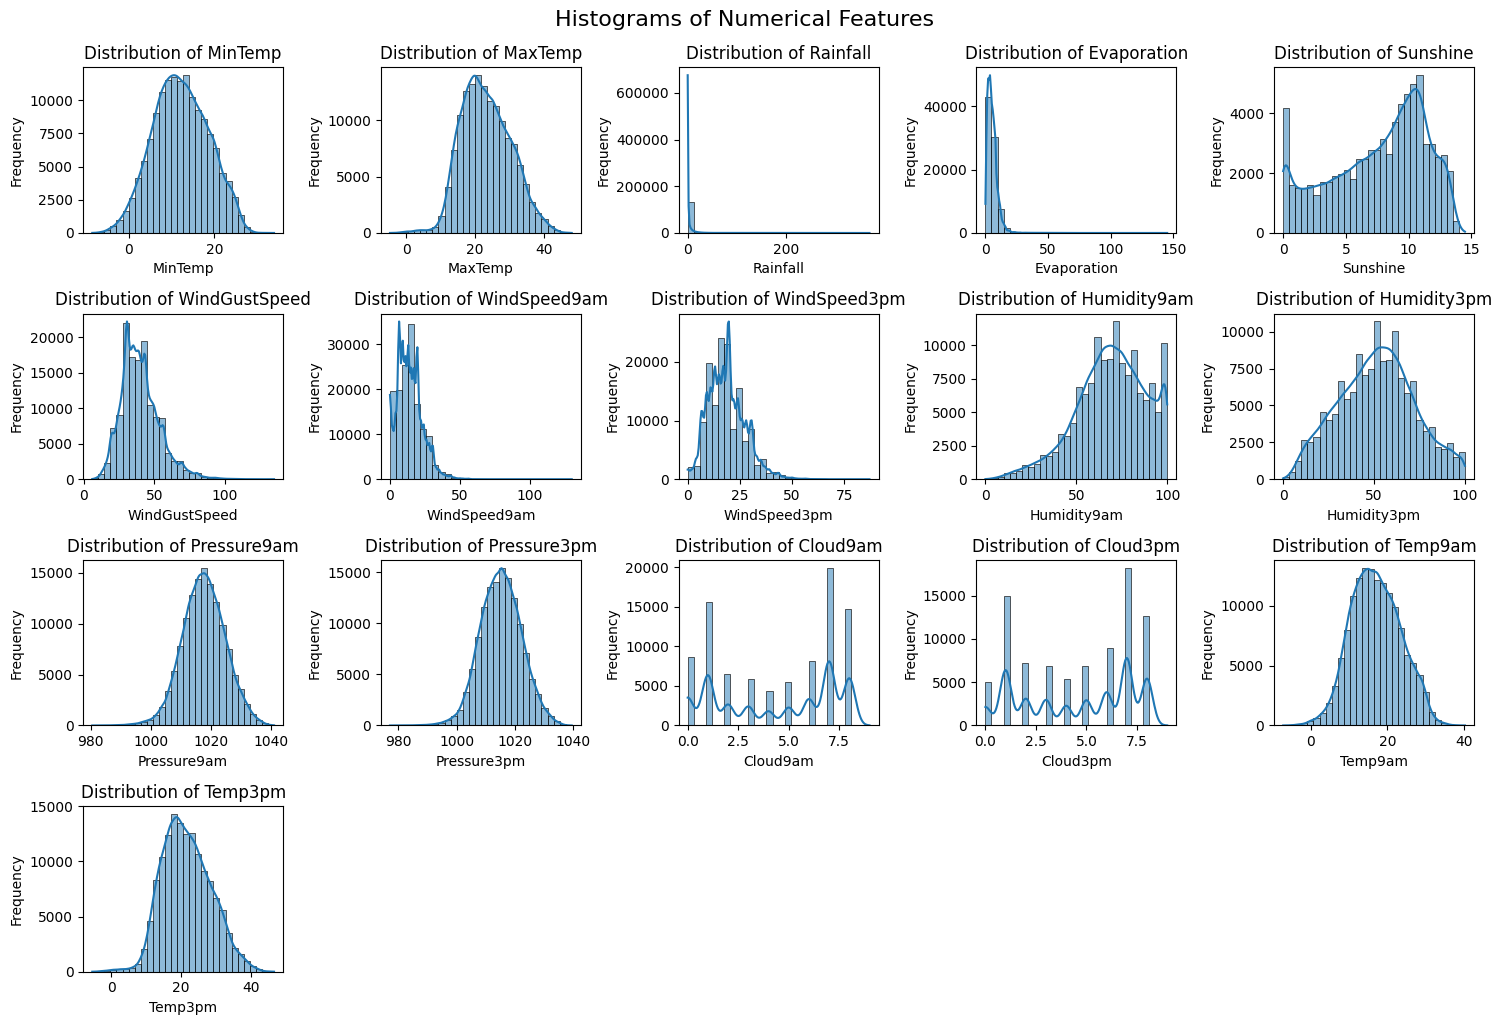

In [14]:
# Select only numerical columns for distribution analysis
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 5, i + 1) # Adjust subplot grid based on number of numerical columns
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)
plt.show()


Analysis of Categorical Columns:

--- Column: Date ---
Date
2017-06-24    49
2017-06-23    49
2017-06-22    49
2017-06-21    49
2017-06-20    49
              ..
2008-01-27     1
2008-01-28     1
2008-01-29     1
2008-01-30     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Number of unique values: 3436
Mode: 2013-03-01
Skipping visualization for Date due to too many unique values (3436).

--- Column: Location ---
Location
Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Hobart              3193
Perth               3193
Melbourne           3193
Brisbane            3193
Albury              3040
MountGinini         3040
GoldCoast           3040
Wollongong          3040
MountGambier        3040
Launceston          3040
AliceSprings        3040
Albany              3040
Townsville          3040
Bendigo             3040
Cairns              3040
Ballarat            3040
Penrith             3039
Newcastle           3039
Tuggeranon

C:\Users\f-moharami\AppData\Local\Temp\ipykernel_2804\711631020.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='pastel')


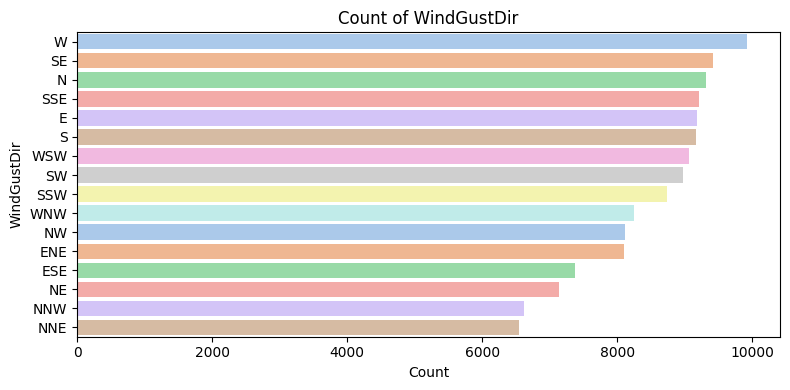


--- Column: WindDir9am ---
WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64
Number of unique values: 16
Mode: N


C:\Users\f-moharami\AppData\Local\Temp\ipykernel_2804\711631020.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='pastel')


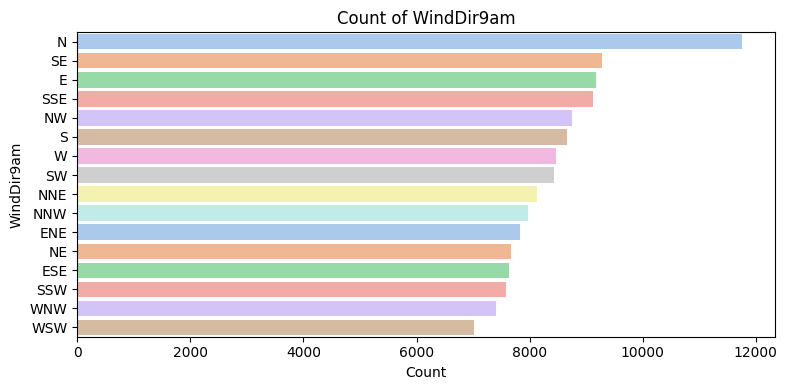


--- Column: WindDir3pm ---
WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: count, dtype: int64
Number of unique values: 16
Mode: SE


C:\Users\f-moharami\AppData\Local\Temp\ipykernel_2804\711631020.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='pastel')


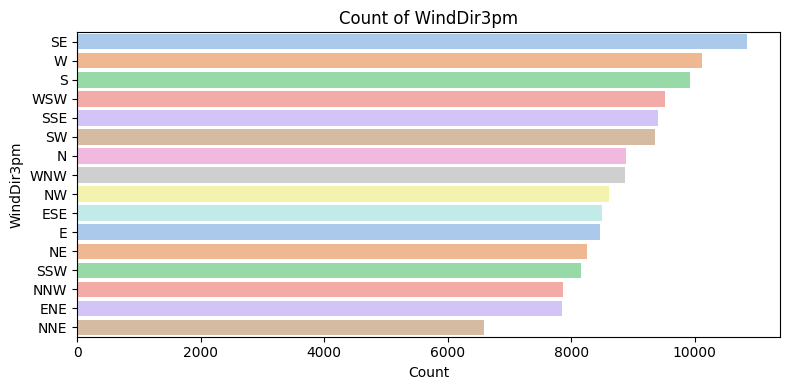


--- Column: RainToday ---
RainToday
No     110319
Yes     31880
Name: count, dtype: int64
Number of unique values: 2
Mode: No


C:\Users\f-moharami\AppData\Local\Temp\ipykernel_2804\711631020.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='pastel')


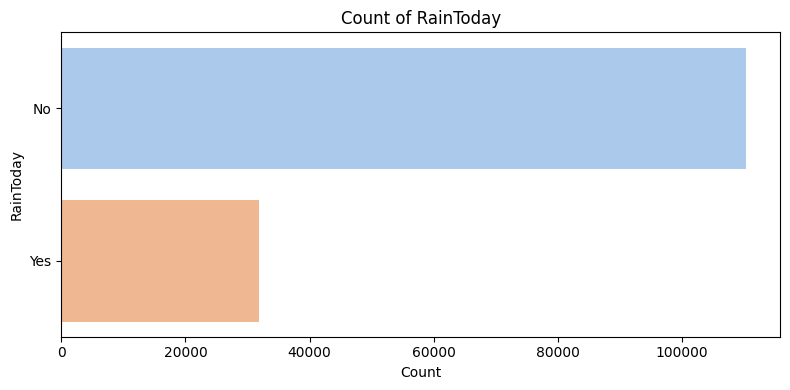


--- Column: RainTomorrow ---
RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64
Number of unique values: 2
Mode: No


C:\Users\f-moharami\AppData\Local\Temp\ipykernel_2804\711631020.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='pastel')


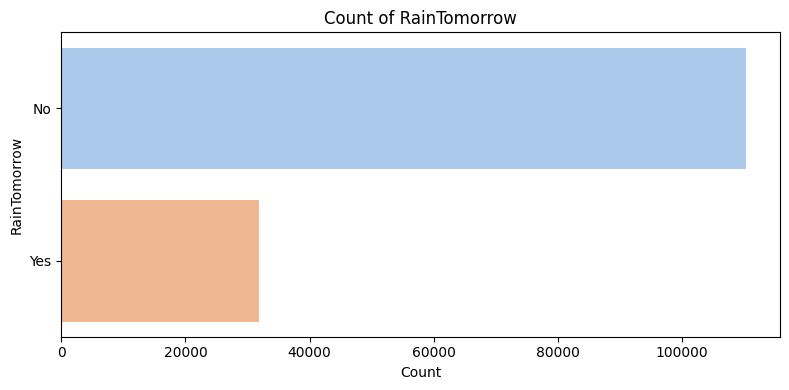

In [15]:
# Select only categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("\nAnalysis of Categorical Columns:")
for col in categorical_cols:
    print(f"\n--- Column: {col} ---")
    print(df[col].value_counts())
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Mode: {df[col].mode()[0]}") # Most frequent value

    # Optional: Visualize top N categories if there are many unique values
    if df[col].nunique() <= 20: # Limit for manageable bar plots
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index, palette='pastel')
        plt.title(f'Count of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping visualization for {col} due to too many unique values ({df[col].nunique()}).")



Correlation Matrix of Numerical Features:
                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    

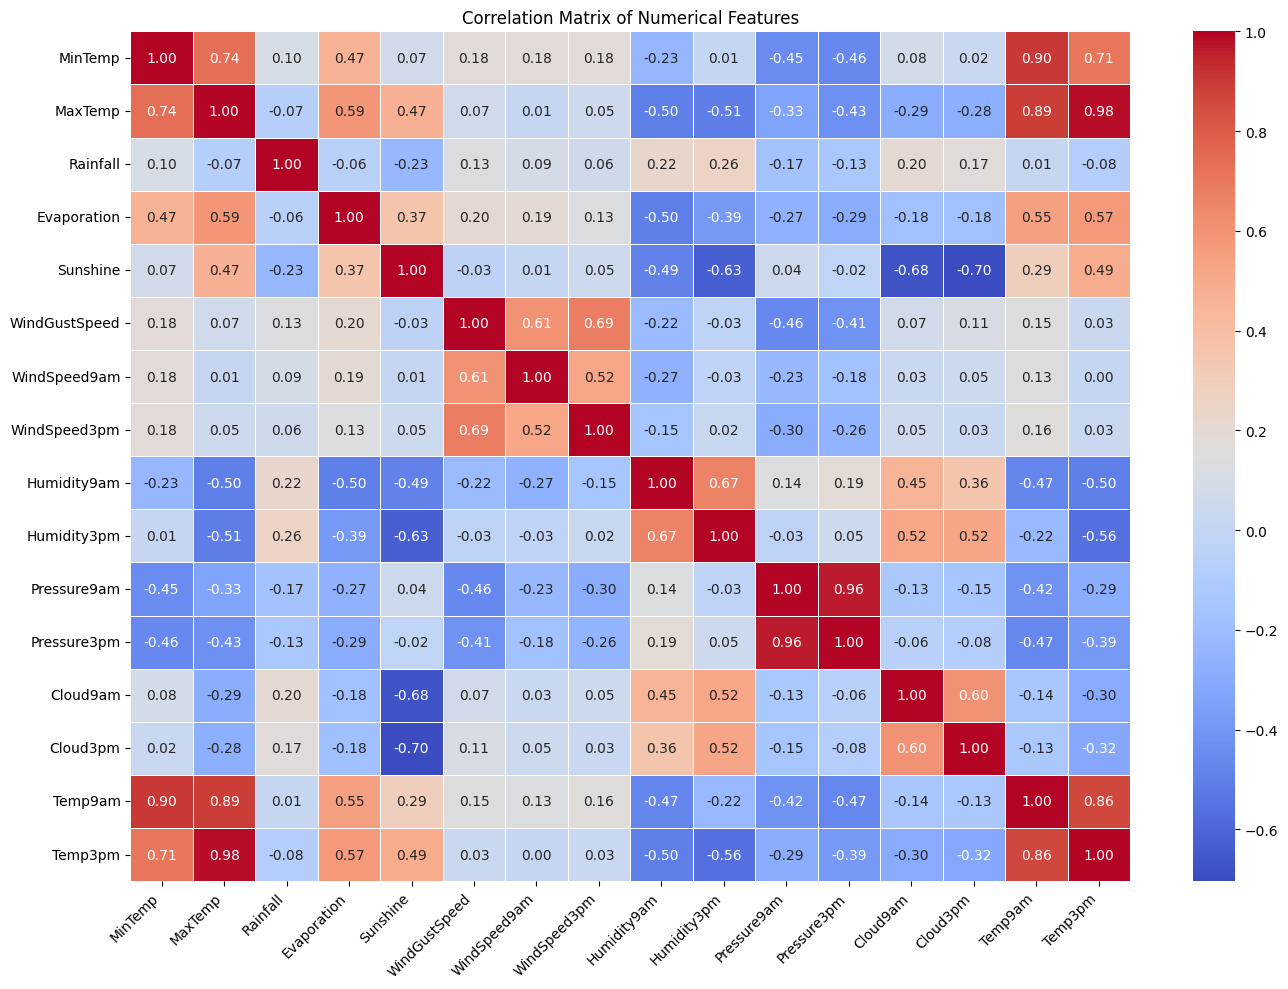

In [16]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()

print("\nCorrelation Matrix of Numerical Features:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
